# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import tree
import graphviz

# Import Dataset Using Pandas

In [4]:
data = pd.read_csv('dataset.csv')

In [9]:
data

,Traffik,Bandwith,Throughput,Link Utilization,Delay,Jitter,Packet Loss,Kongesti Label
0,400,1000,412,0.412,27.556846,0.251,0.0,tidak kongesti
1,400,1000,400,0.400,28.819404,0.179,0.0,tidak kongesti
2,400,1000,400,0.400,29.531998,0.236,0.0,tidak kongesti
3,400,1000,400,0.400,29.201158,0.312,0.0,tidak kongesti
4,400,1000,400,0.400,30.066355,0.266,0.0,tidak kongesti
...,...,...,...,...,...,...,...,...
1795,2000,1000,976,0.976,12.102232,6.219,48.0,kongesti berat
1796,2000,1000,976,0.976,12.120599,6.214,48.0,kongesti berat
1797,2000,1000,964,0.964,12.063958,6.211,42.0,kongesti berat
1798,2000,1000,976,0.976,12.097341,6.221,48.0,kongesti berat


# Melihat korelasi antar parameter

In [6]:
data.corr()

,Traffik,Bandwith,Throughput,Link Utilization,Delay,Jitter,Packet Loss
Traffik,1.000000,NaN,0.837532,0.837549,-0.780183,0.969754,0.952567
Bandwith,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Throughput,0.837532,NaN,1.000000,0.999999,-0.987279,0.701274,0.641045
Link Utilization,0.837549,NaN,0.999999,1.000000,-0.987281,0.701293,0.641069
Delay,-0.780183,NaN,-0.987279,-0.987281,1.000000,-0.618885,-0.565642
Jitter,0.969754,NaN,0.701274,0.701293,-0.618885,1.000000,0.985852
Packet Loss,0.952567,NaN,0.641045,0.641069,-0.565642,0.985852,1.000000


# Hapus yang tidak memiliki korelasi

In [10]:
databaru = data.copy()
del databaru['Bandwith']

In [11]:
databaru

,Traffik,Throughput,Link Utilization,Delay,Jitter,Packet Loss,Kongesti Label
0,400,412,0.412,27.556846,0.251,0.0,tidak kongesti
1,400,400,0.400,28.819404,0.179,0.0,tidak kongesti
2,400,400,0.400,29.531998,0.236,0.0,tidak kongesti
3,400,400,0.400,29.201158,0.312,0.0,tidak kongesti
4,400,400,0.400,30.066355,0.266,0.0,tidak kongesti
...,...,...,...,...,...,...,...
1795,2000,976,0.976,12.102232,6.219,48.0,kongesti berat
1796,2000,976,0.976,12.120599,6.214,48.0,kongesti berat
1797,2000,964,0.964,12.063958,6.211,42.0,kongesti berat
1798,2000,976,0.976,12.097341,6.221,48.0,kongesti berat


# Membuat variabel y dan x

In [12]:
y = databaru[['Kongesti Label']].copy()
klasifikasi_kongesti = ['Traffik', 'Throughput', 'Link Utilization', 'Delay', 'Jitter', 'Packet Loss']
x = databaru[klasifikasi_kongesti].copy()

In [13]:
y

,Kongesti Label
0,tidak kongesti
1,tidak kongesti
2,tidak kongesti
3,tidak kongesti
4,tidak kongesti
...,...
1795,kongesti berat
1796,kongesti berat
1797,kongesti berat
1798,kongesti berat


In [14]:
x

,Traffik,Throughput,Link Utilization,Delay,Jitter,Packet Loss
0,400,412,0.412,27.556846,0.251,0.0
1,400,400,0.400,28.819404,0.179,0.0
2,400,400,0.400,29.531998,0.236,0.0
3,400,400,0.400,29.201158,0.312,0.0
4,400,400,0.400,30.066355,0.266,0.0
...,...,...,...,...,...,...
1795,2000,976,0.976,12.102232,6.219,48.0
1796,2000,976,0.976,12.120599,6.214,48.0
1797,2000,964,0.964,12.063958,6.211,42.0
1798,2000,976,0.976,12.097341,6.221,48.0


# Membuat Datatest dan Datatrain

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)

# Membuat mesin klasifikasi kongesti

In [16]:
kongesti_classifier = DecisionTreeClassifier(criterion='entropy',max_leaf_nodes=10, random_state=10)
kongesti_classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=10, random_state=10)

# Membuat fungsi prediksi

In [17]:
predictions = kongesti_classifier.predict(x_test)

# Membandingkan Hasil Test dan Train

In [18]:
predictions[:10]

array(['kongesti berat', 'kongesti berat', 'tidak kongesti',
       'kongesti berat', 'kongesti berat', 'kongesti berat',
       'kongesti berat', 'kongesti', 'tidak kongesti', 'kongesti berat'],
      dtype=object)

In [19]:
y_test['Kongesti Label'][:10]

764     kongesti berat
278     kongesti berat
1538    tidak kongesti
1780    kongesti berat
123     kongesti berat
1621    kongesti berat
270     kongesti berat
1562          kongesti
962     tidak kongesti
130     kongesti berat
Name: Kongesti Label, dtype: object

# Melihat Tingkat Akurasi Data

In [20]:
accuracy_score(y_true = y_test, y_pred = predictions)

0.9981481481481481

In [21]:
recall_score(y_true = y_test, y_pred = predictions, average = None)

array([1.        , 1.        , 0.99502488])

In [22]:
precision_score(y_true = y_test, y_pred = predictions, average = None)

array([1.        , 0.99690402, 1.        ])

In [23]:
f1_score(y_true = y_test, y_pred = predictions, average = None)

array([1.        , 0.99844961, 0.99750623])

# Melihat Korelasi antar parameter yang sudah di klasifikasi

In [46]:
kongesti_classifier.feature_importances_

array([0.        , 0.83290511, 0.15473889, 0.00820698, 0.00414902,
       0.        ])

# Visualisasi Model

[Text(152.1818181818182, 199.32, 'X[1] <= 888.0\nentropy = 1.155\nsamples = 1260\nvalue = [46, 1, 756, 457]'),
 Text(60.872727272727275, 163.07999999999998, 'X[2] <= 0.806\nentropy = 0.462\nsamples = 503\nvalue = [46, 1, 0, 456]'),
 Text(30.436363636363637, 126.83999999999999, 'entropy = 0.0\nsamples = 456\nvalue = [0, 0, 0, 456]'),
 Text(91.30909090909091, 126.83999999999999, 'X[3] <= 15.131\nentropy = 0.149\nsamples = 47\nvalue = [46, 1, 0, 0]'),
 Text(60.872727272727275, 90.6, 'entropy = 0.0\nsamples = 42\nvalue = [42, 0, 0, 0]'),
 Text(121.74545454545455, 90.6, 'X[3] <= 15.165\nentropy = 0.722\nsamples = 5\nvalue = [4, 1, 0, 0]'),
 Text(91.30909090909091, 54.359999999999985, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0]'),
 Text(152.1818181818182, 54.359999999999985, 'entropy = 0.0\nsamples = 4\nvalue = [4, 0, 0, 0]'),
 Text(243.4909090909091, 163.07999999999998, 'X[4] <= 2.303\nentropy = 0.015\nsamples = 757\nvalue = [0, 0, 756, 1]'),
 Text(213.05454545454546, 126.839999999999

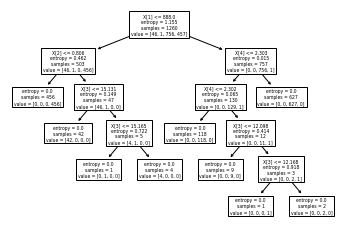

In [26]:
tree.plot_tree(kongesti_classifier)

[Text(422.72727272727275, 830.5, 'Throughput <= 888.0\nentropy = 1.155\nsamples = 1260\nvalue = [46, 1, 756, 457]'),
 Text(169.0909090909091, 679.5, 'Link Utilization <= 0.806\nentropy = 0.462\nsamples = 503\nvalue = [46, 1, 0, 456]'),
 Text(84.54545454545455, 528.5, 'entropy = 0.0\nsamples = 456\nvalue = [0, 0, 0, 456]'),
 Text(253.63636363636363, 528.5, 'Delay <= 15.131\nentropy = 0.149\nsamples = 47\nvalue = [46, 1, 0, 0]'),
 Text(169.0909090909091, 377.5, 'entropy = 0.0\nsamples = 42\nvalue = [42, 0, 0, 0]'),
 Text(338.1818181818182, 377.5, 'Delay <= 15.165\nentropy = 0.722\nsamples = 5\nvalue = [4, 1, 0, 0]'),
 Text(253.63636363636363, 226.5, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0]'),
 Text(422.72727272727275, 226.5, 'entropy = 0.0\nsamples = 4\nvalue = [4, 0, 0, 0]'),
 Text(676.3636363636364, 679.5, 'Jitter <= 2.303\nentropy = 0.015\nsamples = 757\nvalue = [0, 0, 756, 1]'),
 Text(591.8181818181819, 528.5, 'Jitter <= 2.302\nentropy = 0.065\nsamples = 130\nvalue = [0, 0, 

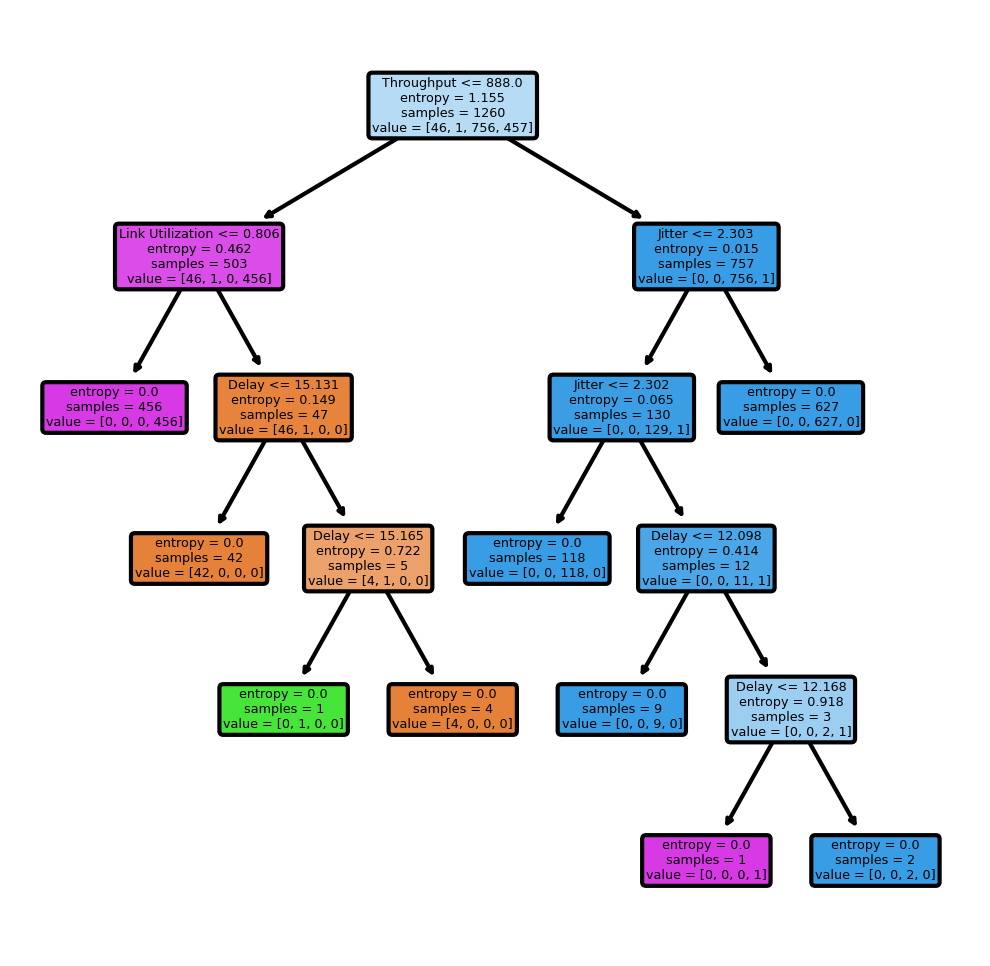

In [47]:
parameter = ['Traffik', 'Throughput', 'Link Utilization', 'Delay', 'Jitter', 'Packet Loss']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(kongesti_classifier, feature_names = parameter, filled = True,  rounded=True)

IndexError: list index out of range

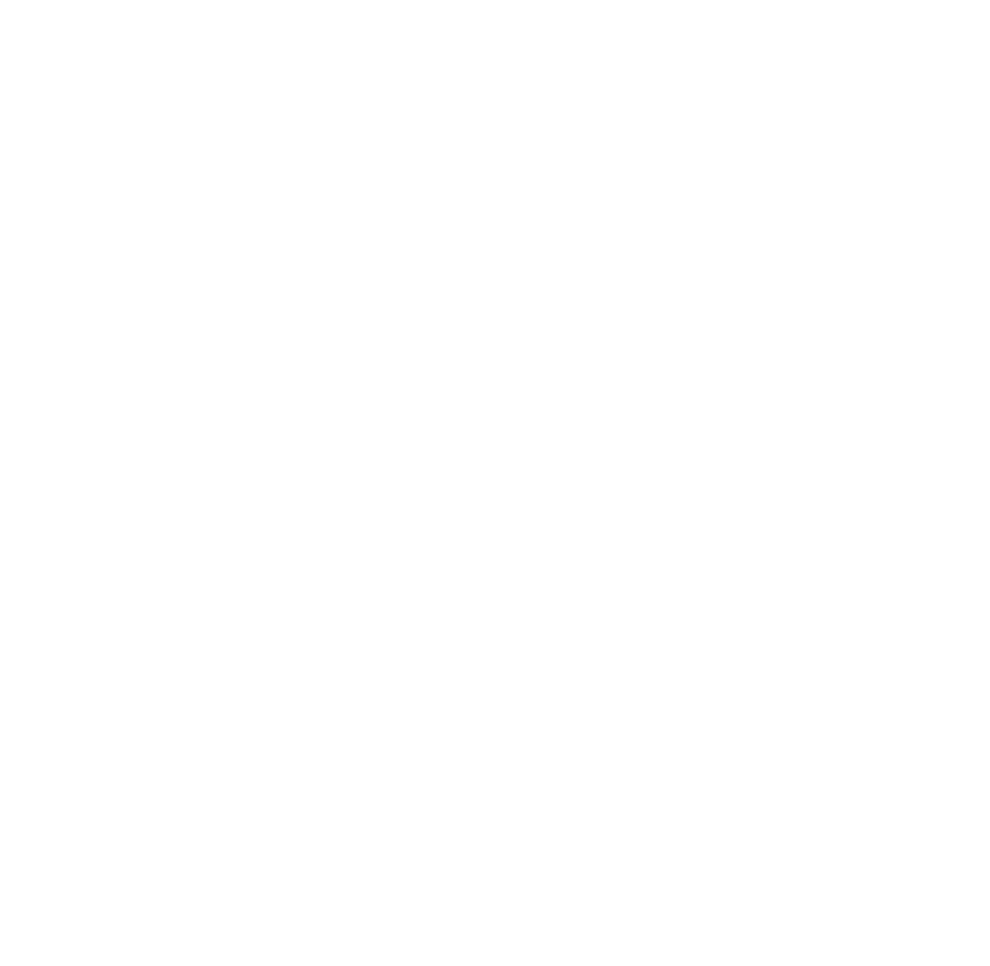

In [48]:
parameter = ['Traffik', 'Throughput', 'Link Utilization', 'Delay', 'Jitter', 'Packet Loss']
label = ['tidak kongesti', 'kongesti', 'kongesti berat']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(kongesti_classifier, feature_names = parameter, class_names=label, filled = True,  rounded=True)